# Loading Libraries and Initialize

In [2]:
%%capture
%run -i 1-ReadingData.ipynb

# Double Exponential Smoothing (DES)
<img src="images/des.png">
- α is smoothing parameter where 0≤ α ≤1.
- β coefficient is a weight in the exponential smoothing where 0≤ β ≤1.
- TES is useful to understand the trend and intercept.

In [3]:
def double_exponential_smoothing(series, alpha, beta):
    """
        alpha - float [0.0, 1.0], smoothing parameter for level
        beta - float [0.0, 1.0], smoothing parameter for trend
    """
    # first value is same as series
    result = [series[0]]
    for n in range(1, len(series)):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

# Calculating Double Exponential Smoothing

In [4]:
alpha, beta = 0.9, 0.9
df['des1'] = double_exponential_smoothing(df['close'], alpha, beta)
alpha, beta = 0.9, 0.02
df['des2'] = double_exponential_smoothing(df['close'], alpha, beta)
alpha, beta = 0.02, 0.9
df['des3'] = double_exponential_smoothing(df['close'], alpha, beta)
alpha, beta = 0.02, 0.02
df['des4'] = double_exponential_smoothing(df['close'], alpha, beta)
df.tail(10)

,open,high,low,close,volume,Name,des1,des2,des3,des4
date,,,,,,,,,,
2018-01-25,174.505,174.9500,170.5300,171.11,41529004,AAPL,168.086720,171.543520,181.931347,175.859731
2018-01-26,172.000,172.0000,170.0600,171.51,39143011,AAPL,170.806005,171.590573,182.777313,175.939886
2018-01-29,170.160,170.1600,167.0700,167.96,50640406,AAPL,165.577669,168.334928,183.268648,175.944246
2018-01-30,165.525,167.3700,164.7000,166.97,46048185,AAPL,165.291624,167.093795,183.436981,175.925130
2018-01-31,166.870,168.4417,166.5000,167.43,32478930,AAPL,167.409104,167.389733,183.323021,175.912197
2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL,168.236278,167.741352,182.938567,175.903270
2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL,155.500610,161.094169,182.012307,175.742761
2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL,151.419449,156.737576,180.564971,175.497560
2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL,166.301879,162.301181,178.961752,175.383077


# Visualizing All Data

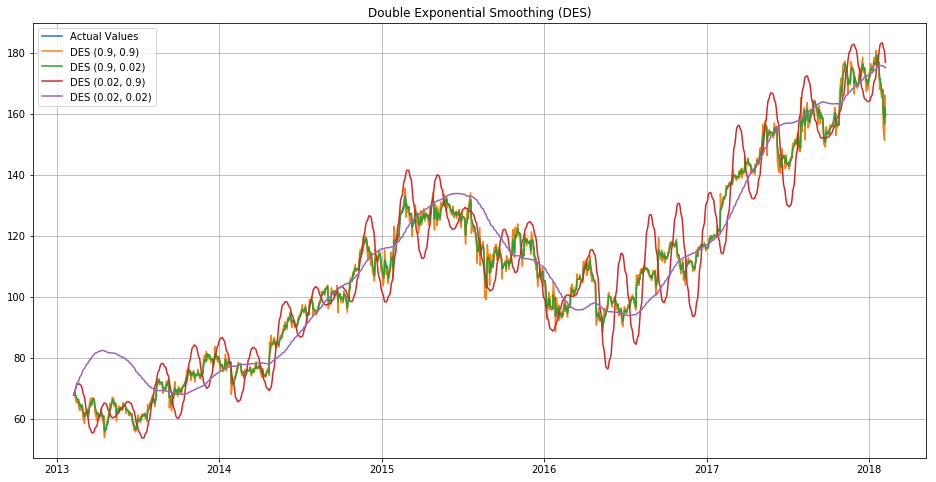

In [5]:
plt.figure(figsize=(16,8))
plt.title('Double Exponential Smoothing (DES)')

plt.plot(df['close'], label='Actual Values')
plt.plot(df['des1'], label='DES (0.9, 0.9)')
plt.plot(df['des2'], label='DES (0.9, 0.02)')
plt.plot(df['des3'], label='DES (0.02, 0.9)')
plt.plot(df['des4'], label='DES (0.02, 0.02)')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Visualizing Last 200 Days

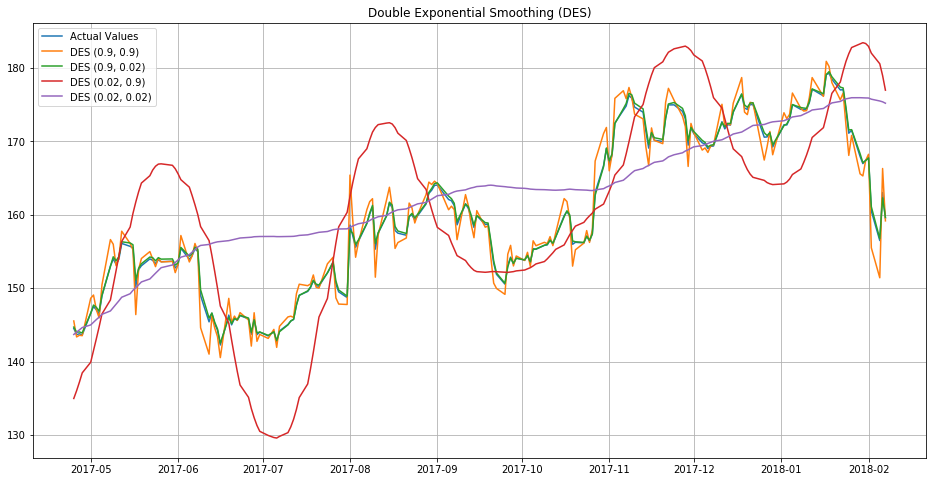

In [6]:
df1 = df[-200:]

plt.figure(figsize=(16,8))
plt.title('Double Exponential Smoothing (DES)')

plt.plot(df1['close'], label='Actual Values')
plt.plot(df1['des1'], label='DES (0.9, 0.9)')
plt.plot(df1['des2'], label='DES (0.9, 0.02)')
plt.plot(df1['des3'], label='DES (0.02, 0.9)')
plt.plot(df1['des4'], label='DES (0.02, 0.02)')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()